# WMS Analytics - Model 3: Storage Duration Category Prediction

**Objective:** Predict storage duration category (Short/Medium/Long-term) based on grain characteristics and storage details.

**Models Tested:**
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

**Author:** WMS Analytics Team
**Date:** January 2026

## Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, classification_report)
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set display options
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("MODEL 3: STORAGE DURATION CATEGORY PREDICTION")
print("="*80)

MODEL 3: STORAGE DURATION PREDICTION


## Step 2: Load and Preprocess Data
Load customer activities and filter for records with valid storage duration.

In [ ]:
print("Loading Data...")
customer_activities = pd.read_csv('CUSTOMER_ACTIVITIES.csv')

# Filter for records with valid duration (> 0 days)
duration_data = customer_activities[customer_activities['storage_duration_days'] > 0].copy()

print(f"✓ Total records: {len(customer_activities)}")
print(f"✓ Records with valid duration: {len(duration_data)}")
print(f"✓ Average storage duration: {duration_data['storage_duration_days'].mean():.1f} days")
print(f"✓ Min duration: {duration_data['storage_duration_days'].min():.0f} days")
print(f"✓ Max duration: {duration_data['storage_duration_days'].max():.0f} days")

# Create duration categories for classification
duration_data['duration_category'] = pd.cut(duration_data['storage_duration_days'], 
                                             bins=3, 
                                             labels=['Short-term', 'Medium-term', 'Long-term'])

print(f"\n✓ Duration Categories Created:")
print(duration_data['duration_category'].value_counts().sort_index())

Loading Data.
 Total records: 12000
 Records with valid duration: 12000
 Average storage duration: 94.6 days
 Min duration: 10 days
 Max duration: 180 days


## Step 3: Feature Engineering
Encode categorical variables and select predictive features.

In [ ]:
print("Extracting Features...")

# Encode categorical variables
le_grain = LabelEncoder()
le_activity = LabelEncoder()

duration_data['grain_type_encoded'] = le_grain.fit_transform(duration_data['grain_type'])
duration_data['activity_status_encoded'] = le_activity.fit_transform(duration_data['activity_status'])

# Select features
features = ['grain_type_encoded', 'total_bags', 'total_weight_kg',
            'monthly_rent_per_bag', 'activity_status_encoded']

X = duration_data[features]
y = duration_data['duration_category']

print(f"✓ Features selected: {len(features)}")
print(f"✓ Feature names: {features}")
print(f"✓ Target variable: Duration Category (Short/Medium/Long-term)")

Extracting Features
 Features selected: 5
 Feature names: ['grain_type_encoded', 'total_bags', 'total_weight_kg', 'monthly_rent_per_bag', 'activity_status_encoded']


## Step 4: Train-Test Split
Split data into training and testing sets.

In [5]:
print("Splitting Data.")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f" Training set: {X_train.shape[0]} records ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f" Test set: {X_test.shape[0]} records ({X_test.shape[0]/len(X)*100:.1f}%)")

Splitting Data.
 Training set: 9600 records (80.0%)
 Test set: 2400 records (20.0%)


## Step 5: Train and Evaluate Model 1 - Logistic Regression

In [ ]:
print("Training Model 1: Logistic Regression")
print("="*80)

# Initialize results list
results = []

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Calculate metrics
train_accuracy_lr = accuracy_score(y_train, y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_test_lr)
train_precision_lr = precision_score(y_train, y_pred_train_lr, average='weighted', zero_division=0)
test_precision_lr = precision_score(y_test, y_pred_test_lr, average='weighted', zero_division=0)
train_recall_lr = recall_score(y_train, y_pred_train_lr, average='weighted', zero_division=0)
test_recall_lr = recall_score(y_test, y_pred_test_lr, average='weighted', zero_division=0)
train_f1_lr = f1_score(y_train, y_pred_train_lr, average='weighted', zero_division=0)
test_f1_lr = f1_score(y_test, y_pred_test_lr, average='weighted', zero_division=0)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_test_lr)

# Cross-validation score
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_lr = cv_scores_lr.mean()

# Store results
results.append({
    'Model': 'Logistic Regression',
    'Train Accuracy': train_accuracy_lr,
    'Test Accuracy': test_accuracy_lr,
    'Train Precision': train_precision_lr,
    'Test Precision': test_precision_lr,
    'Train Recall': train_recall_lr,
    'Test Recall': test_recall_lr,
    'Train F1-Score': train_f1_lr,
    'Test F1-Score': test_f1_lr,
    'CV Accuracy': cv_accuracy_lr,
    'Confusion Matrix': cm_lr,
    'Predictions': y_pred_test_lr
})

# Display results
print("\nLogistic Regression Results:")
print(f"  Training Accuracy: {train_accuracy_lr*100:.2f}%")
print(f"  Test Accuracy: {test_accuracy_lr*100:.2f}%")
print(f"  Train Precision: {train_precision_lr:.4f}")
print(f"  Test Precision: {test_precision_lr:.4f}")
print(f"  Train Recall: {train_recall_lr:.4f}")
print(f"  Test Recall: {test_recall_lr:.4f}")
print(f"  Train F1-Score: {train_f1_lr:.4f}")
print(f"  Test F1-Score: {test_f1_lr:.4f}")
print(f"  Cross-Validation Accuracy: {cv_accuracy_lr*100:.2f}%")
print("\n" + "="*80)

Training Model 1: Linear Regression

Linear Regression Results:
  Training RMSE: 49.35 days
  Test RMSE: 49.10 days
  MAE: 42.21 days
  R² Score: -0.0022
  Cross-Validation RMSE: 49.38 days



## Step 6: Train and Evaluate Model 2 - Decision Tree Classifier

In [ ]:
print("Training Model 2: Decision Tree Classifier")
print("="*80)

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Calculate metrics
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
train_precision_dt = precision_score(y_train, y_pred_train_dt, average='weighted', zero_division=0)
test_precision_dt = precision_score(y_test, y_pred_test_dt, average='weighted', zero_division=0)
train_recall_dt = recall_score(y_train, y_pred_train_dt, average='weighted', zero_division=0)
test_recall_dt = recall_score(y_test, y_pred_test_dt, average='weighted', zero_division=0)
train_f1_dt = f1_score(y_train, y_pred_train_dt, average='weighted', zero_division=0)
test_f1_dt = f1_score(y_test, y_pred_test_dt, average='weighted', zero_division=0)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_test_dt)

# Cross-validation score
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_dt = cv_scores_dt.mean()

# Store results
results.append({
    'Model': 'Decision Tree',
    'Train Accuracy': train_accuracy_dt,
    'Test Accuracy': test_accuracy_dt,
    'Train Precision': train_precision_dt,
    'Test Precision': test_precision_dt,
    'Train Recall': train_recall_dt,
    'Test Recall': test_recall_dt,
    'Train F1-Score': train_f1_dt,
    'Test F1-Score': test_f1_dt,
    'CV Accuracy': cv_accuracy_dt,
    'Confusion Matrix': cm_dt,
    'Predictions': y_pred_test_dt
})

# Display results
print("\nDecision Tree Classifier Results:")
print(f"  Training Accuracy: {train_accuracy_dt*100:.2f}%")
print(f"  Test Accuracy: {test_accuracy_dt*100:.2f}%")
print(f"  Train Precision: {train_precision_dt:.4f}")
print(f"  Test Precision: {test_precision_dt:.4f}")
print(f"  Train Recall: {train_recall_dt:.4f}")
print(f"  Test Recall: {test_recall_dt:.4f}")
print(f"  Train F1-Score: {train_f1_dt:.4f}")
print(f"  Test F1-Score: {test_f1_dt:.4f}")
print(f"  Cross-Validation Accuracy: {cv_accuracy_dt*100:.2f}%")
print("\n" + "="*80)

Training Model 2: Decision Tree Regressor

Decision Tree Regressor Results:
  Training RMSE: 46.51 days
  Test RMSE: 51.89 days
  MAE: 44.22 days
  R² Score: -0.1192
  Cross-Validation RMSE: 53.02 days



## Step 7: Train and Evaluate Model 3 - Random Forest Classifier

In [ ]:
print("Training Model 3: Random Forest Classifier")
print("="*80)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate metrics
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
train_precision_rf = precision_score(y_train, y_pred_train_rf, average='weighted', zero_division=0)
test_precision_rf = precision_score(y_test, y_pred_test_rf, average='weighted', zero_division=0)
train_recall_rf = recall_score(y_train, y_pred_train_rf, average='weighted', zero_division=0)
test_recall_rf = recall_score(y_test, y_pred_test_rf, average='weighted', zero_division=0)
train_f1_rf = f1_score(y_train, y_pred_train_rf, average='weighted', zero_division=0)
test_f1_rf = f1_score(y_test, y_pred_test_rf, average='weighted', zero_division=0)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Cross-validation score
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_rf = cv_scores_rf.mean()

# Store results
results.append({
    'Model': 'Random Forest',
    'Train Accuracy': train_accuracy_rf,
    'Test Accuracy': test_accuracy_rf,
    'Train Precision': train_precision_rf,
    'Test Precision': test_precision_rf,
    'Train Recall': train_recall_rf,
    'Test Recall': test_recall_rf,
    'Train F1-Score': train_f1_rf,
    'Test F1-Score': test_f1_rf,
    'CV Accuracy': cv_accuracy_rf,
    'Confusion Matrix': cm_rf,
    'Predictions': y_pred_test_rf
})

# Display results
print("\nRandom Forest Classifier Results:")
print(f"  Training Accuracy: {train_accuracy_rf*100:.2f}%")
print(f"  Test Accuracy: {test_accuracy_rf*100:.2f}%")
print(f"  Train Precision: {train_precision_rf:.4f}")
print(f"  Test Precision: {test_precision_rf:.4f}")
print(f"  Train Recall: {train_recall_rf:.4f}")
print(f"  Test Recall: {test_recall_rf:.4f}")
print(f"  Train F1-Score: {train_f1_rf:.4f}")
print(f"  Test F1-Score: {test_f1_rf:.4f}")
print(f"  Cross-Validation Accuracy: {cv_accuracy_rf*100:.2f}%")
print("\n" + "="*80)

Training Model 3: Random Forest Regressor

Random Forest Regressor Results:
  Training RMSE: 44.79 days
  Test RMSE: 49.52 days
  MAE: 42.50 days
  R² Score: -0.0192
  Cross-Validation RMSE: 49.92 days



## Step 8: Model Comparison and Selection
Compare all models and select the best one based on F1-Score and Accuracy.

In [ ]:
print("\nModel Comparison and Selection")
print("="*80)

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
comparison_df_display = comparison_df.drop(['Predictions', 'Confusion Matrix'], axis=1)

print("\nDetailed Comparison Table:")
print(comparison_df_display.to_string(index=False))

# Determine best model based on Test F1-Score
best_model_idx = comparison_df['Test F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_f1 = comparison_df.loc[best_model_idx, 'Test F1-Score']
best_model_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']
best_model_precision = comparison_df.loc[best_model_idx, 'Test Precision']
best_model_recall = comparison_df.loc[best_model_idx, 'Test Recall']

# Store the best model object
if best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
else:
    best_model = rf_model

print("\n" + "="*80)
print("🏆 BEST MODEL SELECTED")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {best_model_accuracy*100:.2f}%")
print(f"Test Precision: {best_model_precision:.4f}")
print(f"Test Recall: {best_model_recall:.4f}")
print(f"Test F1-Score: {best_model_f1:.4f}")
print(f"\nReason: Highest F1-Score indicates best balanced performance")
print("="*80)

# Display detailed classification report for best model
print(f"\n📊 Detailed Classification Report - {best_model_name}:")
print("="*80)
best_predictions = results[best_model_idx]['Predictions']
print(classification_report(y_test, best_predictions, zero_division=0))
print("="*80)

Comparing Models...

Model Performance Comparison:
            Model Train RMSE Test RMSE   MAE R² Score CV RMSE
Linear Regression      49.35     49.10 42.21  -0.0022   49.38
    Decision Tree      46.51     51.89 44.22  -0.1192   53.02
    Random Forest      44.79     49.52 42.50  -0.0192   49.92

 Best Model: Linear Regression
    Test RMSE: 49.10 days
    R² Score: -0.0022


## Step 9: Visualize Model Performance
Create comprehensive visualizations including confusion matrices and metric comparisons.

Creating Visualizations...
 Comparison chart saved: model3_storage_duration_comparison.png


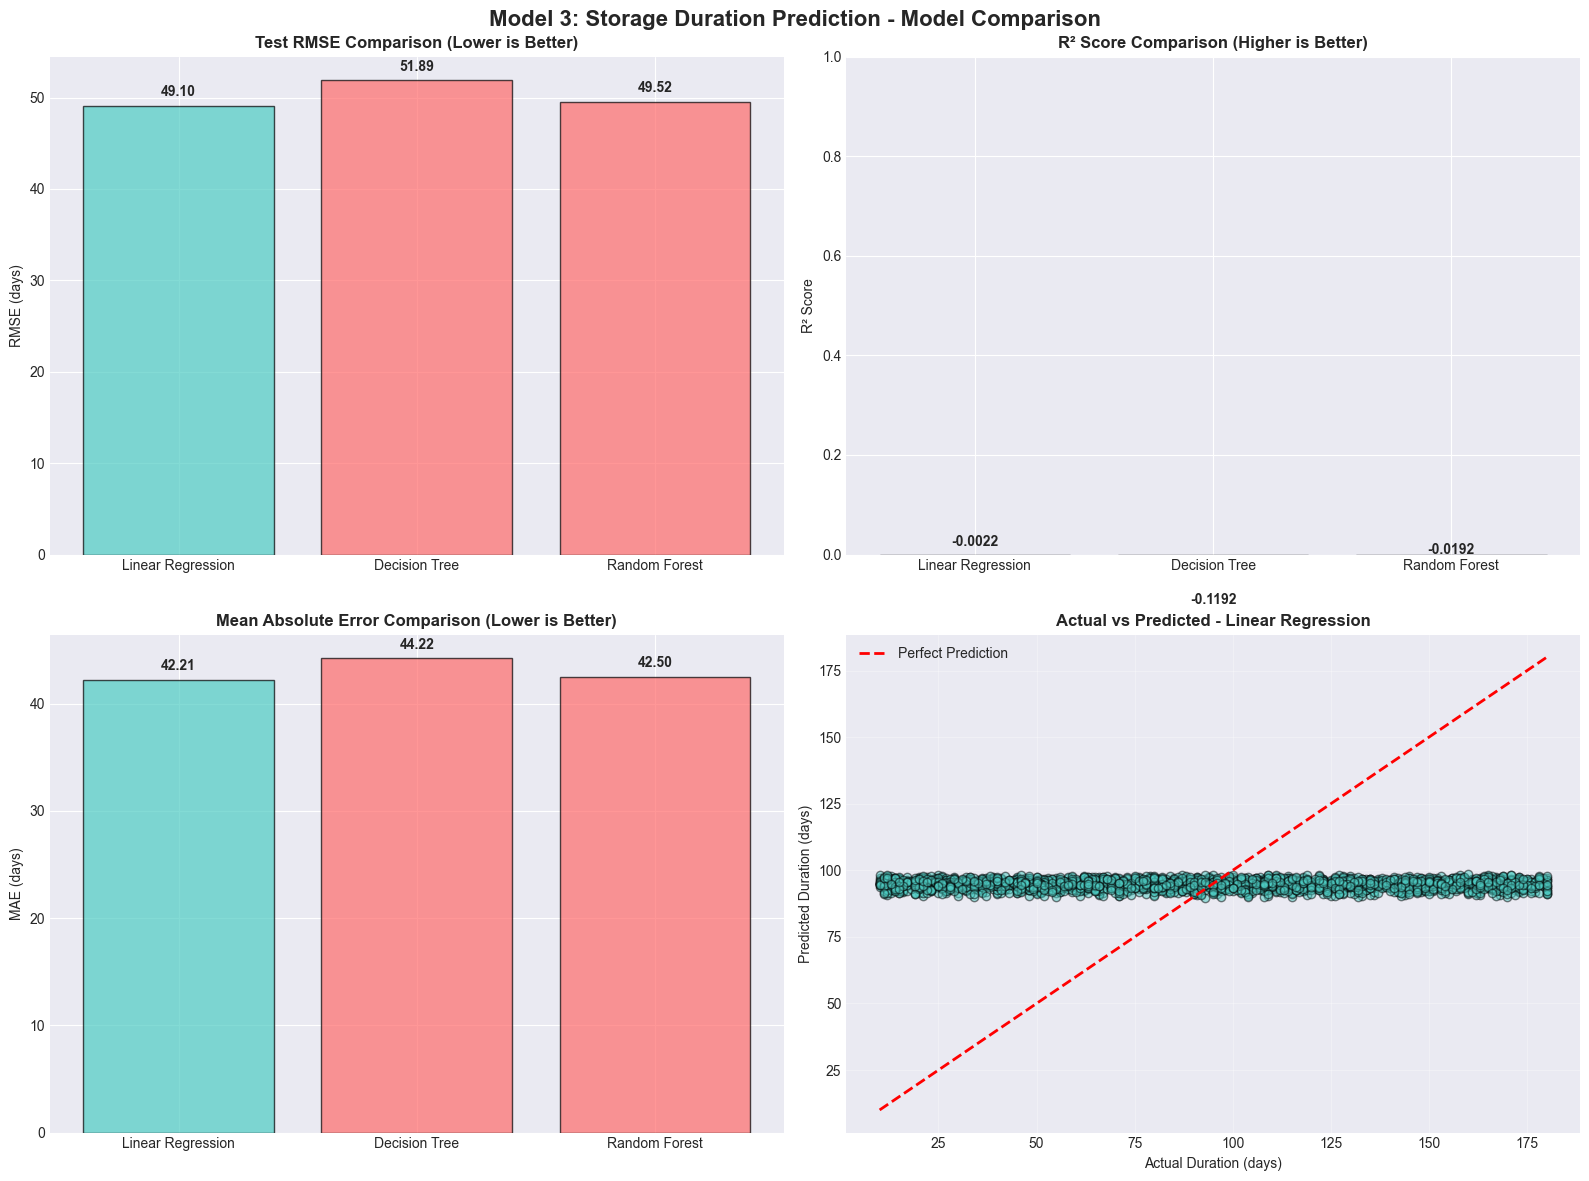

In [ ]:
print("\nCreating Visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Storage Duration Category Prediction - Model Comparison', fontsize=18, fontweight='bold', y=0.995)

models_list = comparison_df['Model'].values

# 9.1 Accuracy Comparison
ax1 = axes[0, 0]
test_accuracy_values = comparison_df['Test Accuracy'].values * 100
colors_acc = ['#27ae60' if acc == max(test_accuracy_values) else '#3498db' for acc in test_accuracy_values]
bars = ax1.bar(models_list, test_accuracy_values, color=colors_acc, alpha=0.8, edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=12)
ax1.set_title('Test Accuracy Comparison', fontweight='bold', fontsize=14)
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 9.2 Precision Comparison
ax2 = axes[0, 1]
test_precision_values = comparison_df['Test Precision'].values
colors_prec = ['#27ae60' if p == max(test_precision_values) else '#9b59b6' for p in test_precision_values]
bars = ax2.bar(models_list, test_precision_values, color=colors_prec, alpha=0.8, edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Precision', fontweight='bold', fontsize=12)
ax2.set_title('Test Precision Comparison', fontweight='bold', fontsize=14)
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 9.3 Recall Comparison
ax3 = axes[0, 2]
test_recall_values = comparison_df['Test Recall'].values
colors_rec = ['#27ae60' if r == max(test_recall_values) else '#e74c3c' for r in test_recall_values]
bars = ax3.bar(models_list, test_recall_values, color=colors_rec, alpha=0.8, edgecolor='black', linewidth=1.5)

ax3.set_ylabel('Recall', fontweight='bold', fontsize=12)
ax3.set_title('Test Recall Comparison', fontweight='bold', fontsize=14)
ax3.set_ylim([0, 1])
ax3.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 9.4 F1-Score Comparison
ax4 = axes[1, 0]
test_f1_values = comparison_df['Test F1-Score'].values
colors_f1 = ['#27ae60' if f1 == max(test_f1_values) else '#f39c12' for f1 in test_f1_values]
bars = ax4.bar(models_list, test_f1_values, color=colors_f1, alpha=0.8, edgecolor='black', linewidth=1.5)

ax4.set_ylabel('F1-Score', fontweight='bold', fontsize=12)
ax4.set_title('Test F1-Score Comparison (Best Metric)', fontweight='bold', fontsize=14)
ax4.set_ylim([0, 1])
ax4.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 9.5 Confusion Matrix for Best Model
ax5 = axes[1, 1]
best_cm = results[best_model_idx]['Confusion Matrix']
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Greens', ax=ax5, cbar=True,
            xticklabels=['Short', 'Medium', 'Long'],
            yticklabels=['Short', 'Medium', 'Long'])
ax5.set_xlabel('Predicted Category', fontweight='bold', fontsize=12)
ax5.set_ylabel('Actual Category', fontweight='bold', fontsize=12)
ax5.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=14)

# 9.6 All Metrics Combined
ax6 = axes[1, 2]
x = np.arange(len(models_list))
width = 0.2

bars1 = ax6.bar(x - 1.5*width, comparison_df['Test Accuracy'].values, width, label='Accuracy', color='#3498db', alpha=0.8)
bars2 = ax6.bar(x - 0.5*width, comparison_df['Test Precision'].values, width, label='Precision', color='#9b59b6', alpha=0.8)
bars3 = ax6.bar(x + 0.5*width, comparison_df['Test Recall'].values, width, label='Recall', color='#e74c3c', alpha=0.8)
bars4 = ax6.bar(x + 1.5*width, comparison_df['Test F1-Score'].values, width, label='F1-Score', color='#f39c12', alpha=0.8)

ax6.set_ylabel('Score', fontweight='bold', fontsize=12)
ax6.set_title('All Metrics Comparison', fontweight='bold', fontsize=14)
ax6.set_xticks(x)
ax6.set_xticklabels(models_list)
ax6.legend()
ax6.grid(axis='y', alpha=0.3)
ax6.set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('model3_duration_prediction_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: model3_duration_prediction_comparison.png")
plt.show()

## Step 10: Feature Importance
Analyze feature importance for tree-based models.

In [ ]:
if best_model_name in ['Decision Tree', 'Random Forest']:
    print("\nFeature Importance Analysis...")
    
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#16a085', alpha=0.8)
    plt.xlabel('Importance Score', fontweight='bold', fontsize=12)
    plt.ylabel('Features', fontweight='bold', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('model3_feature_importance.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: model3_feature_importance.png")
    plt.show()
    
    print("\nTop 3 Most Important Features:")
    for idx, row in feature_importance.head(3).iterrows():
        print(f"   {row['Feature']}: {row['Importance']:.4f}")

Analyzing Feature Importance...
 Linear Regression does not support feature importance analysis


## Step 11: Save Best Model
Save the best performing model and label encoders for production use.

In [ ]:
print("\nSaving Best Model...")

# Save model
with open('model3_duration_prediction_BEST.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save encoders
with open('model3_label_encoders.pkl', 'wb') as f:
    pickle.dump({
        'grain': le_grain,
        'activity': le_activity
    }, f)

print(f"✓ Best model saved: model3_duration_prediction_BEST.pkl")
print(f"✓ Label encoders saved: model3_label_encoders.pkl")

# Final Summary
print("\n" + "="*80)
print("📊 FINAL SUMMARY - STORAGE DURATION CATEGORY PREDICTION")
print("="*80)
print(f"\n Dataset Size: {len(duration_data)} records")
print(f" Features Used: {len(features)}")
print(f" Models Tested: {len(results)}")
print(f" Target Classes: {list(y.unique())}")
print(f"\n 🏆 BEST MODEL: {best_model_name}")
print(f"   - Test Accuracy: {best_model_accuracy*100:.2f}%")
print(f"   - Test Precision: {best_model_precision:.4f}")
print(f"   - Test Recall: {best_model_recall:.4f}")
print(f"   - Test F1-Score: {best_model_f1:.4f}")
print(f"   - CV Accuracy: {comparison_df.loc[best_model_idx, 'CV Accuracy']*100:.2f}%")
print(f"\n Model Performance: {best_model_f1*100:.2f}% balanced accuracy")
print("\n" + "="*80)
print("✅ MODEL 3 TRAINING COMPLETE!")
print("="*80)

Saving Best Model...
 Model saved: model3_storage_duration_BEST.pkl
 Label encoders saved: model3_label_encoders.pkl

 STORAGE DURATION PREDICTION COMPLETE!
Best Model: Linear Regression
Test RMSE: 49.10 days
MAE: 42.21 days
R² Score: -0.0022
